In [209]:
import pandas as pd 
import os
from pybedtools import BedTool
import seaborn as sns
import numpy as np

%matplotlib inline

Compare sgRNAs designed with AlleleAnalyzer for WTC to platinum sgRNAs from Scott & Zhang 2017.

Make BED file of first 5 exons of *PCSK9* using GENCODE release 19 (hg19) as done in that paper.

In [114]:
# load gene annotations

pcsk9_annots = pd.read_csv('/pollard/data/genetics/GENCODE/release19/pcsk9_annots.gtf',
                           sep='\t', header=None, names=[
                               'seqname',
                               'source',
                               'feature',
                               'start',
                               'end',
                               'score',
                               'strand',
                               'frame',
                               'attribute'
                           ])

In [115]:
pcsk9_exons = pcsk9_annots.query('(feature == "exon")').copy()
pcsk9_exons['exon_number'] = pcsk9_exons['attribute'].str.split('exon_number').str[1].str.split(';').str[0]
pcsk9_exons['level'] = pcsk9_exons['attribute'].str.split('level').str[1].str.split(';').str[0]
pcsk9_exons['exon_number'] = pcsk9_exons['exon_number'].astype(int)
pcsk9_exons['level'] = pcsk9_exons['level'].astype(int)
pcsk9_exons['transcript_type'] = pcsk9_exons['attribute'].str.split('transcript_type "').str[1].str.split('";').str[0]

In [116]:
pcsk9_first_five_exons = pcsk9_exons.query('(0 <= exon_number <= 5) and (level < 3) and (transcript_type == "protein_coding")')

In [117]:
exon_ids = []

for ix, row in pcsk9_first_five_exons.iterrows():
    exon_ids.append(row['attribute'].split('exon_id "')[1].split('";')[0])

In [118]:
# make BED file of exons

pcsk9_first_five_exons_bed = pcsk9_first_five_exons[['seqname', 'start', 'end', 'exon_number']].copy()
pcsk9_first_five_exons_bed.to_csv('/pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/sgRNA_comparison_scott_zhang/dat/pcsk9_first_five_exons.bed',
                                 sep='\t', header=None, index=None)

In [119]:
sel_genes_spcas9 = pd.read_csv('171101_NM_Supplementary_Information/SpCas9_platinum_targets-select_genes.csv',
                              skiprows=1)

In [120]:
pcsk9_spcas9_platinum = sel_genes_spcas9.query('transcript == "PCSK9-001"').copy()

In [121]:
pcsk9_spcas9_platinum_first_five = pcsk9_spcas9_platinum[pcsk9_spcas9_platinum['exon id'].isin(exon_ids)]

In [127]:
pcsk9_spcas9_platinum_first_five.columns

Index(['chrm', 'gene', 'feature', 'exon start', 'exon end', 'strand',
       'transcript id', 'transcript', 'exon id', 'start', 'end', 'cut site',
       'strand.1', 'PAM orient.', 'seq.', 'PAM seq.', 'target variation',
       '0-mismatch', '1-mismatch', '2-mismatch', '3-mismatch', 'total'],
      dtype='object')

In [123]:
pcsk9_spcas9_platinum_first_five.head()

,chrm,gene,feature,exon start,exon end,strand,transcript id,transcript,exon id,start,...,strand.1,PAM orient.,seq.,PAM seq.,target variation,0-mismatch,1-mismatch,2-mismatch,3-mismatch,total
1360,chr1,ENSG00000169174.9,exon,55509516,55509707,+,ENST00000302118.5,PCSK9-001,ENSE00001279167.1,55509530,...,BS,R,AGCACCACCACGTAGGTGCC,AGG,0.000025,0.0,0.0,1.0,18.0,19.0
1361,chr1,ENSG00000169174.9,exon,55509516,55509707,+,ENST00000302118.5,PCSK9-001,ENSE00001279167.1,55509537,...,BS,R,CTCCTTCAGCACCACCACGT,AGG,0.000017,0.0,0.0,2.0,40.0,42.0
1362,chr1,ENSG00000169174.9,exon,55509516,55509707,+,ENST00000302118.5,PCSK9-001,ENSE00001279167.1,55509535,...,TS,R,CACCTACGTGGTGGTGCTGA,AGG,0.000025,0.0,0.0,4.0,46.0,50.0
1363,chr1,ENSG00000169174.9,exon,55509516,55509707,+,ENST00000302118.5,PCSK9-001,ENSE00001279167.1,55509538,...,TS,R,CTACGTGGTGGTGCTGAAGG,AGG,0.000025,0.0,0.0,2.0,67.0,69.0
1364,chr1,ENSG00000169174.9,exon,55509516,55509707,+,ENST00000302118.5,PCSK9-001,ENSE00001279167.1,55509595,...,BS,R,GGGCAGCCTGGGCCTGCAGG,CGG,0.000025,0.0,2.0,19.0,278.0,299.0


In [130]:
pcsk9_spcas9_platinum_first_five['PAM orient.'].unique()

array(['R'], dtype=object)

In [122]:
# make BED file for PCSK9 platinum sgRNAs

pcsk9_platinum_first_five_bed = pcsk9_spcas9_platinum_first_five[['chrm', 'start', 'end', 'seq.']]

In [112]:
pcsk9_platinum_first_five_bed.to_csv('/pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/sgRNA_comparison_scott_zhang/dat/pcsk9_platinum_targets_first_five_exons.bed',
                                 sep='\t', header=None, index=None)

In [113]:
len(pcsk9_platinum_first_five_bed)

65

Verified that platinum sgRNAs overlap the exons I've identified via IGV. 

Reformat variants:

`python ~/projects/AlleleAnalyzer/preprocessing/generate_gens_dfs/get_gens_df.py /pollard/home/kathleen/conklin_wt_seq_data/wtc_wgs_data/phased_yin/wtc_PASS_hg19.phased.vcf.gz pcsk9_first_five_exons.bed pcsk9_first_five_exons_gens --bed -v`

Annotate variants:

`python ~/projects/AlleleAnalyzer/preprocessing/annotate_variants/annot_variants.py -v pcsk9_first_five_exons_gens.h5 SpCas9 /pollard/data/projects/AlleleAnalyzer_data/pam_sites_hg19/ /pollard/data/vertebrate_genomes/human/hg19/hg19/hg19.fa pcsk9_first_five_exons_annots --guide_len=20`

Design sgRNAs for these first 5 exons in WTC using AlleleAnalyzer with CRISPOR specificity scoring.

`python ~/projects/AlleleAnalyzer/scripts/gen_sgRNAs.py /pollard/home/kathleen/conklin_wt_seq_data/wtc_wgs_data/phased_yin/wtc_PASS_hg19.phased.vcf.gz /pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/sgRNA_comparison_scott_zhang/dat/pcsk9_first_five_exons_annots.h5 /pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/sgRNA_comparison_scott_zhang/dat/pcsk9_first_five_exons.bed /pollard/data/projects/AlleleAnalyzer_data/pam_sites_hg19/ /pollard/data/vertebrate_genomes/human/hg19/hg19/hg19.fa /pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/sgRNA_comparison_scott_zhang/dat/pcsk9_first_five_wtc SpCas9 20 -v --hom --bed --crispor=hg19`

Make BED for IGV

`python ~/projects/AlleleAnalyzer/scripts/make_pretty_igv.py pcsk9_first_five_wtc.tsv pcsk9_first_five_wtc_igv pcsk9_first_five_wtc`

In [132]:
aa_sgrnas_pcsk9_first_five = pd.read_csv('/pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/sgRNA_comparison_scott_zhang/dat/pcsk9_first_five_wtc.tsv',
                                        sep='\t')

aa_sgrnas_pcsk9_first_five['chrom'] = 'chr' + aa_sgrnas_pcsk9_first_five['chrom'].astype(str)

In [133]:
aa_sgrnas_pcsk9_first_five.head()

,chrom,start,stop,ref,alt,variant_position_in_guide,gRNAs,variant_position,strand,cas_type,gRNA_alt,gRNA_ref,scores_ref,offtargcount_ref,scores_alt,offtargcount_alt,locus,id,guide_id
0,chr1,55505210,55505230,0.0,0.0,0.0,AGGTTTCCGCAGCGACGTCG,0.0,positive,SpCas9,AGGTTTCCGCAGCGACGTCG,AGGTTTCCGCAGCGACGTCG,99,18,99,18,1,0,SpCas9_0
1,chr1,55505219,55505239,0.0,0.0,0.0,CAGCGACGTCGAGGCGCTCA,0.0,positive,SpCas9,CAGCGACGTCGAGGCGCTCA,CAGCGACGTCGAGGCGCTCA,94,30,94,30,1,1,SpCas9_1
2,chr1,55505226,55505246,0.0,0.0,0.0,GTCGAGGCGCTCATGGTTGC,0.0,positive,SpCas9,GTCGAGGCGCTCATGGTTGC,GTCGAGGCGCTCATGGTTGC,87,42,87,42,1,2,SpCas9_2
3,chr1,55505229,55505249,0.0,0.0,0.0,GAGGCGCTCATGGTTGCAGG,0.0,positive,SpCas9,GAGGCGCTCATGGTTGCAGG,GAGGCGCTCATGGTTGCAGG,77,153,77,153,1,3,SpCas9_3
4,chr1,55505230,55505250,0.0,0.0,0.0,AGGCGCTCATGGTTGCAGGC,0.0,positive,SpCas9,AGGCGCTCATGGTTGCAGGC,AGGCGCTCATGGTTGCAGGC,76,118,76,118,1,4,SpCas9_4


In [188]:
chroms = []
starts = []
stops = []
ids = []
scores = []

for ix, row in aa_sgrnas_pcsk9_first_five.iterrows():
    if row['strand'] == 'positive':
        chroms.append('chr1')
        starts.append(row['start'])
        stops.append(row['stop'] + 3) 
        ids.append(ix)
        scores.append(row['scores_ref'])
    else:
        chroms.append('chr1')
        starts.append(row['start'] - 3)
        stops.append(row['stop']) 
        ids.append(ix)
        scores.append(row['scores_ref'])
        
new_aa_bed_df = pd.DataFrame({
    'chrom': chroms,
    'start': starts,
    'stop': stops,
    'score': scores
    
}).drop_duplicates()

# new_aa_bed_df['size'] = new_aa_bed_df['stop'] - new_aa_bed_df['start']
new_aa_bed = BedTool.from_dataframe(new_aa_bed_df)

In [10]:
len(aa_sgrnas_pcsk9_first_five)

254

In [33]:
aa_sgrnas_pcsk9_first_five.head()

,chrom,start,stop,ref,alt,variant_position_in_guide,gRNAs,variant_position,strand,cas_type,gRNA_alt,gRNA_ref,scores_ref,offtargcount_ref,scores_alt,offtargcount_alt,locus,id,guide_id
0,chr1,55505210,55505230,0.0,0.0,0.0,AGGTTTCCGCAGCGACGTCG,0.0,positive,SpCas9,AGGTTTCCGCAGCGACGTCG,AGGTTTCCGCAGCGACGTCG,99,18,99,18,1,0,SpCas9_0
1,chr1,55505219,55505239,0.0,0.0,0.0,CAGCGACGTCGAGGCGCTCA,0.0,positive,SpCas9,CAGCGACGTCGAGGCGCTCA,CAGCGACGTCGAGGCGCTCA,94,30,94,30,1,1,SpCas9_1
2,chr1,55505226,55505246,0.0,0.0,0.0,GTCGAGGCGCTCATGGTTGC,0.0,positive,SpCas9,GTCGAGGCGCTCATGGTTGC,GTCGAGGCGCTCATGGTTGC,87,42,87,42,1,2,SpCas9_2
3,chr1,55505229,55505249,0.0,0.0,0.0,GAGGCGCTCATGGTTGCAGG,0.0,positive,SpCas9,GAGGCGCTCATGGTTGCAGG,GAGGCGCTCATGGTTGCAGG,77,153,77,153,1,3,SpCas9_3
4,chr1,55505230,55505250,0.0,0.0,0.0,AGGCGCTCATGGTTGCAGGC,0.0,positive,SpCas9,AGGCGCTCATGGTTGCAGGC,AGGCGCTCATGGTTGCAGGC,76,118,76,118,1,4,SpCas9_4


In [12]:
len(aa_sgrnas_pcsk9_first_five.query('scores_ref > 50'))

206

In [96]:
platinum_bed = BedTool('/pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/sgRNA_comparison_scott_zhang/dat/pcsk9_platinum_targets_first_five_exons.bed')

# aa_bed = BedTool.from_dataframe(aa_sgrnas_pcsk9_first_five.sort_values(by='scores_ref',
#                                                                        ascending=False)[['chrom','start','stop']].head(65))

aa_bed = BedTool.from_dataframe(aa_sgrnas_pcsk9_first_five[['chrom','start','stop','gRNAs','scores_ref']])



In [97]:
aa_bed.head()

chr1	55505210	55505230	AGGTTTCCGCAGCGACGTCG	99
 chr1	55505219	55505239	CAGCGACGTCGAGGCGCTCA	94
 chr1	55505226	55505246	GTCGAGGCGCTCATGGTTGC	87
 chr1	55505229	55505249	GAGGCGCTCATGGTTGCAGG	77
 chr1	55505230	55505250	AGGCGCTCATGGTTGCAGGC	76
 chr1	55505249	55505269	CGGGCGCCGCCGTTCAGTTC	97
 chr1	55505250	55505270	GGGCGCCGCCGTTCAGTTCA	89
 chr1	55505261	55505281	TTCAGTTCAGGGTCTGAGCC	41
 chr1	55505264	55505284	AGTTCAGGGTCTGAGCCTGG	49
 chr1	55505275	55505295	TGAGCCTGGAGGAGTGAGCC	44
 

In [162]:
len(platinum_bed.intersect(new_aa_bed, wb=True, f=1.0, u=True).to_dataframe())

/pollard/home/kathleen/miniconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3439: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, *args, **kwargs)


65

In [176]:
aa_platinum = new_aa_bed.intersect(platinum_bed, u=True, f=1.0).to_dataframe().drop_duplicates()

/pollard/home/kathleen/miniconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3439: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, *args, **kwargs)


In [177]:
len(aa_platinum)

65

In [181]:
aa_platinum['platinum'] = True

In [178]:
aa_platinum.to_csv('dat/new_aa_plat.bed',
                  sep='\t', index=False, header=False)

In [199]:
new_aa_bed_df.head()

,chrom,start,stop,score
0,chr1,55505210,55505233,99
1,chr1,55505219,55505242,94
2,chr1,55505226,55505249,87
3,chr1,55505229,55505252,77
4,chr1,55505230,55505253,76


In [200]:
aa_platinum.columns = ['chrom','start','stop','score','platinum']

In [201]:
aa_platinum.head()

,chrom,start,stop,score,platinum
0,chr1,55509535,55509558,66,True
1,chr1,55509538,55509561,58,True
2,chr1,55509600,55509623,59,True
3,chr1,55509601,55509624,49,True
7,chr1,55509602,55509625,57,True


In [210]:
aa_bed_df = new_aa_bed_df.merge(aa_platinum, how='outer', left_on=['chrom','start','stop','score'],
                               right_on=['chrom','start','stop','score']).replace(np.nan, False)

In [211]:
aa_bed_df

,chrom,start,stop,score,platinum
0,chr1,55505210,55505233,99,False
1,chr1,55505219,55505242,94,False
2,chr1,55505226,55505249,87,False
3,chr1,55505229,55505252,77,False
4,chr1,55505230,55505253,76,False
5,chr1,55505249,55505272,97,False
6,chr1,55505250,55505273,89,False
7,chr1,55505261,55505284,41,False
8,chr1,55505264,55505287,49,False
9,chr1,55505275,55505298,44,False


In [212]:
len(aa_bed_df.query('platinum'))

65

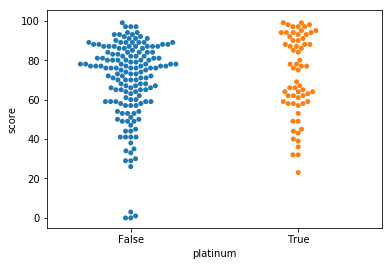

In [213]:
sns.swarmplot(x='platinum', y='score', data=aa_bed_df)

In [214]:
aa_bed_df.query('platinum')['score'].mean()

72.35384615384615

In [215]:
aa_bed_df.query('~platinum')['score'].mean()

69.84276729559748

In [103]:
pcsk9_spcas9_platinum_first_five.head()

NameError: name 'pcsk9_spcas9_platinum_first_five' is not defined

In [108]:
platinum_beddf = platinum_bed.to_dataframe()

/pollard/home/kathleen/miniconda3/lib/python3.7/site-packages/pybedtools/bedtool.py:3439: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  return pandas.read_table(self.fn, *args, **kwargs)


In [109]:
platinum_beddf.head()

,chrom,start,end,name
0,chr1,55509530,55509553,AGCACCACCACGTAGGTGCC
1,chr1,55509537,55509560,CTCCTTCAGCACCACCACGT
2,chr1,55509535,55509558,CACCTACGTGGTGGTGCTGA
3,chr1,55509538,55509561,CTACGTGGTGGTGCTGAAGG
4,chr1,55509595,55509618,GGGCAGCCTGGGCCTGCAGG


In [110]:
platinum_bed_starts = platinum_beddf['start'].to_list()
platinum_bed_ends = platinum_beddf['end'].to_list()

In [93]:
len(aa_platinum.name.unique())

65

In [94]:
aa_sgrnas_pcsk9_first_five['platinum'] = aa_sgrnas_pcsk9_first_five['gRNAs'].isin(aa_platinum['name'])

In [112]:
aa_sgrnas_pcsk9_first_five = aa_sgrnas_pcsk9_first_five.query('(start in @platinum_bed_starts) or (stop in @platinum_bed_ends)').copy()

In [113]:
len(aa_sgrnas_pcsk9_first_five)

90

In [95]:
len(aa_sgrnas_pcsk9_first_five.query('platinum'))

60

In [58]:
len(platinum_bed)

65

In [39]:
aa_sgrnas_pcsk9_first_five.head()

,chrom,start,stop,ref,alt,variant_position_in_guide,gRNAs,variant_position,strand,cas_type,gRNA_alt,gRNA_ref,scores_ref,offtargcount_ref,scores_alt,offtargcount_alt,locus,id,guide_id
0,chr1,55505210,55505230,0.0,0.0,0.0,AGGTTTCCGCAGCGACGTCG,0.0,positive,SpCas9,AGGTTTCCGCAGCGACGTCG,AGGTTTCCGCAGCGACGTCG,99,18,99,18,1,0,SpCas9_0
1,chr1,55505219,55505239,0.0,0.0,0.0,CAGCGACGTCGAGGCGCTCA,0.0,positive,SpCas9,CAGCGACGTCGAGGCGCTCA,CAGCGACGTCGAGGCGCTCA,94,30,94,30,1,1,SpCas9_1
2,chr1,55505226,55505246,0.0,0.0,0.0,GTCGAGGCGCTCATGGTTGC,0.0,positive,SpCas9,GTCGAGGCGCTCATGGTTGC,GTCGAGGCGCTCATGGTTGC,87,42,87,42,1,2,SpCas9_2
3,chr1,55505229,55505249,0.0,0.0,0.0,GAGGCGCTCATGGTTGCAGG,0.0,positive,SpCas9,GAGGCGCTCATGGTTGCAGG,GAGGCGCTCATGGTTGCAGG,77,153,77,153,1,3,SpCas9_3
4,chr1,55505230,55505250,0.0,0.0,0.0,AGGCGCTCATGGTTGCAGGC,0.0,positive,SpCas9,AGGCGCTCATGGTTGCAGGC,AGGCGCTCATGGTTGCAGGC,76,118,76,118,1,4,SpCas9_4


In [55]:
len(platinum_bed)

65